In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DV/NFA 2018.csv')

In [ ]:
data.head(10)

,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population
0,Armenia,ARM,Asia,Western Asia,1992,BiocapPerCap,1.611286e-01,0.135023,0.083836,0.013718,0.033669,0.000000e+00,4.273741e-01,949.033,3449000
1,Armenia,ARM,Asia,Western Asia,1992,BiocapTotGHA,5.558130e+05,465763.337400,289190.662300,47320.224590,116139.598200,0.000000e+00,1.474227e+06,949.033,3449000
2,Armenia,ARM,Asia,Western Asia,1992,EFConsPerCap,3.909225e-01,0.189137,0.000001,0.004138,0.033669,1.112225e+00,1.730092e+00,949.033,3449000
3,Armenia,ARM,Asia,Western Asia,1992,EFConsTotGHA,1.348487e+06,652429.066600,4.327841,14272.803690,116139.598200,3.836620e+06,5.967954e+06,949.033,3449000
4,Armenia,ARM,Asia,Western Asia,1992,EFExportsPerCap,1.124910e-03,0.002283,0.000000,0.000438,0.000000,4.819043e-02,5.203676e-02,949.033,3449000
5,Armenia,ARM,Asia,Western Asia,1992,EFExportsTotGHA,3.880378e+03,7875.331688,0.000000,1512.195296,0.000000,1.662329e+05,1.795008e+05,949.033,3449000
6,Armenia,ARM,Asia,Western Asia,1992,EFImportsPerCap,2.309189e-01,0.056397,0.000001,0.003312,0.000000,8.791121e-02,3.785406e-01,949.033,3449000
7,Armenia,ARM,Asia,Western Asia,1992,EFImportsTotGHA,7.965547e+05,194541.060900,4.327841,11426.058040,0.000000,3.032497e+05,1.305776e+06,949.033,3449000
8,Armenia,ARM,Asia,Western Asia,1992,EFProdPerCap,1.611286e-01,0.135023,0.000000,0.001264,0.033669,1.072504e+00,1.403588e+00,949.033,3449000
9,Armenia,ARM,Asia,Western Asia,1992,EFProdTotGHA,5.558130e+05,465763.337400,0.000000,4358.940944,116139.598200,3.699604e+06,4.841678e+06,949.033,3449000


## 2 . India’s GDP trend from 1961-2014

In [ ]:
india_df = data[data['country'].isin(['India'])]
india_df.head(10)

,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population
33670,India,IND,Asia,Southern Asia,1961,BiocapPerCap,3.247146e-01,1.315423e-02,4.705458e-02,8.421385e-02,1.732219e-02,0.000000e+00,4.864595e-01,309.354,458691000
33671,India,IND,Asia,Southern Asia,1961,BiocapTotGHA,1.489437e+08,6.033726e+06,2.158351e+07,3.862813e+07,7.945533e+06,0.000000e+00,2.231346e+08,309.354,458691000
33672,India,IND,Asia,Southern Asia,1961,EFConsPerCap,3.341339e-01,1.374371e-02,1.437365e-01,1.078099e-02,1.732219e-02,9.525972e-02,6.149769e-01,309.354,458691000
33673,India,IND,Asia,Southern Asia,1961,EFConsTotGHA,1.532642e+08,6.304115e+06,6.593062e+07,4.945142e+06,7.945533e+06,4.369477e+07,2.820844e+08,309.354,458691000
33674,India,IND,Asia,Southern Asia,1961,EFExportsPerCap,4.834755e-03,3.199550e-04,5.880000e-05,5.875740e-04,0.000000e+00,2.085338e-03,7.886405e-03,309.354,458691000
33675,India,IND,Asia,Southern Asia,1961,EFExportsTotGHA,2.217659e+06,1.467605e+05,2.696328e+04,2.695150e+05,0.000000e+00,9.565256e+05,3.617423e+06,309.354,458691000
33676,India,IND,Asia,Southern Asia,1961,EFImportsPerCap,1.425397e-02,9.094330e-04,8.550020e-04,1.340000e-05,0.000000e+00,1.241255e-02,2.844440e-02,309.354,458691000
33677,India,IND,Asia,Southern Asia,1961,EFImportsTotGHA,6.538169e+06,4.171489e+05,3.921817e+05,6.167076e+03,0.000000e+00,5.693524e+06,1.304719e+07,309.354,458691000
33678,India,IND,Asia,Southern Asia,1961,EFProdPerCap,3.247146e-01,1.315423e-02,1.429402e-01,1.135512e-02,1.732219e-02,8.493250e-02,5.944189e-01,309.354,458691000
33679,India,IND,Asia,Southern Asia,1961,EFProdTotGHA,1.489437e+08,6.033726e+06,6.556540e+07,5.208490e+06,7.945533e+06,3.895778e+07,2.726546e+08,309.354,458691000


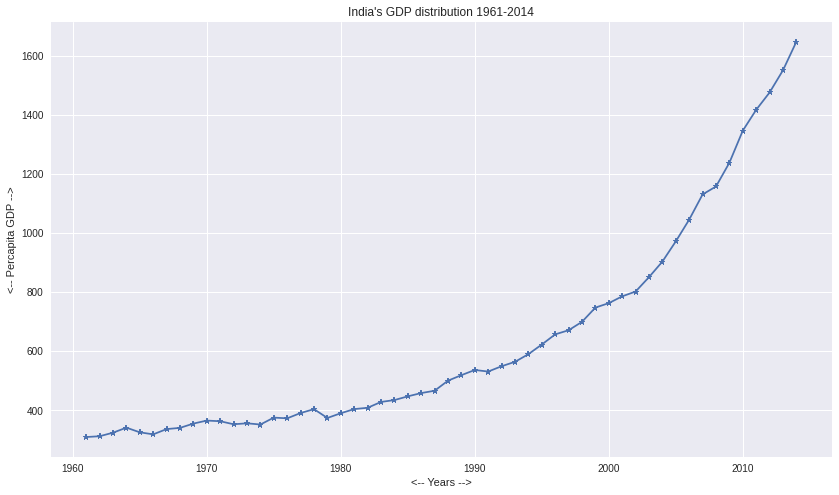

In [ ]:
plt.figure(figsize=(14,8))
plt.style.use('seaborn')
plt.plot(india_df.year,india_df['Percapita GDP (2010 USD)'],marker='*')
plt.title("India's GDP distribution 1961-2014",loc='center')
plt.xlabel('<-- Years -->')
plt.ylabel('<-- Percapita GDP -->')
plt.show()

We can see that in the years after the indian independence india’s Per Capita GDP has been an increasing curve , there has been some decrease near the end of 1970’s and 80’s but managed to develop in a more faster rate after the beginning of the 21st century

## 3 .Contributions of major asian countries in forest land 

In [ ]:
asia_forest = data[data.year==2014]
asia_forest = asia_forest[asia_forest.UN_region=='Asia'].loc[:,['country','forest_land']]
asia_forest = asia_forest.groupby(by='country',as_index=False).sum()

In [ ]:
px.choropleth(data_frame= asia_forest ,locations='country',locationmode='country names',scope='asia',color='forest_land',range_color=(100,500000000),title='Asian countries contribution in forest_land')

According to the values of the year  2014, We can clearly understand by the low values of forest land in most asian parts are mostly because of the desert like regions and high mountains. comparatively india and china are the countries in asia which have a good amount of forest land

##4. Countries with high population and high production

In [ ]:
pop_sample = data.sort_values(by='population',ascending=False)
pop_sample = pop_sample[pop_sample.year==2014]
pop_sample = pop_sample[pop_sample.country!='World']
pop_sample = pop_sample.loc[:,['country','record','total','population']]
pop_sample = pop_sample[pop_sample.record=='EFProdTotGHA']
pop_sample.drop(columns='record',inplace=True)
pop_sample = pop_sample.head(5)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Total Production', x=pop_sample.country, y=pop_sample.total),
    go.Bar(name='Population', x=pop_sample.country, y=pop_sample.population)
])
# Change the bar mode
fig.update_layout(barmode='group',width=1200,title='Top 5 Countries having high population and high EF-production Global Hectares - 2014',xaxis_title='Countries',yaxis_title = 'EF-Prod and Population')
fig.show()

There is an indicator that countries like china and india do have high production because of the high population and we can also see that USA in spite of having lesser population seems to beat developing country like india.

##5. Top countries based on the EF consumption

In [ ]:
ef = data[data.year==2014]

In [ ]:
efcons_gh = ef[ef.record.isin(['EFConsTotGHA'])].loc[:,['country','total']]
efcons_pc = ef[ef.record.isin(['EFConsPerCap'])].loc[:,['country','total']]

In [ ]:
efcons_gh.sort_values(by='total',ascending=False,inplace=True)
efcons_gh = efcons_gh.head(8)
efcons_pc = efcons_pc[efcons_pc.country.isin(list(efcons_gh.country.values))]
efcons_pc = efcons_pc.head(8)

In [ ]:
efcons_gh.sort_values(by='country',inplace=True)

In [ ]:
efcons_pc.sort_values(by='country',inplace=True)

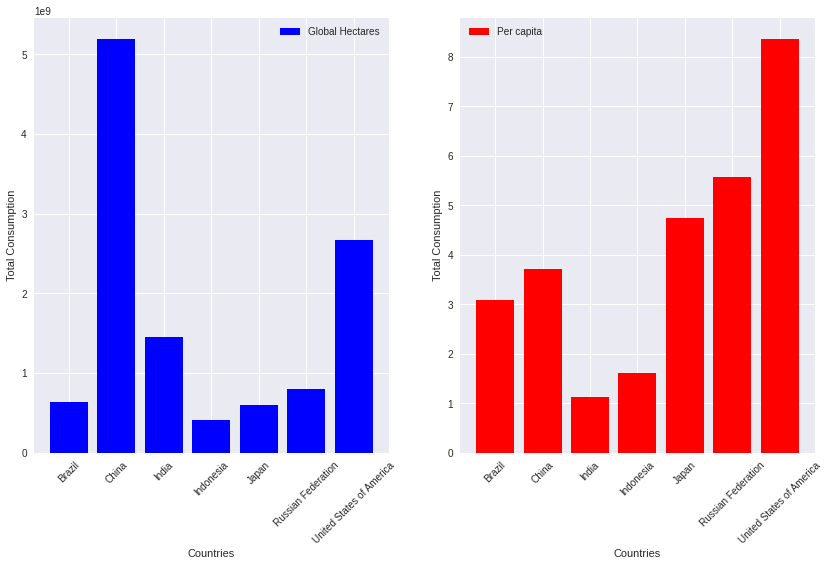

In [ ]:
plt.figure(figsize=(14,8))
plt.style.use('seaborn')
plt.subplot(1,2,1)
plt.xticks(rotation = 45)
plt.bar(efcons_gh.country[:-1],efcons_gh.total[:-1],color='b',align='center',label='Global Hectares')
plt.xlabel('Countries')
plt.ylabel('Total Consumption')
plt.legend()
plt.subplot(1,2,2)
plt.xlabel('Countries')
plt.ylabel('Total Consumption')
plt.bar(efcons_pc.country[:-1],efcons_pc.total[:-1],color ='r',align='center',label='Per capita')

plt.legend()
plt.xticks(rotation = 45)
plt.show()

When we compare the countries with the globally accepted scale we can see china leading the EF consumption, 

Another insight we get from this is the calculations done by the countries that is the per capita shows higher values for some countries which are actually lower in the global hectares scale. This shows the necessity of a global scale for measuring these quantities also


## 6. Contributions of land types on total production 

In [ ]:
prod_tot = data[data.record.isin(['EFProdTotGHA'])]
prod_tot = prod_tot.loc[:,['crop_land','grazing_land','forest_land','built_up_land']]
prod_tot = prod_tot.sum()

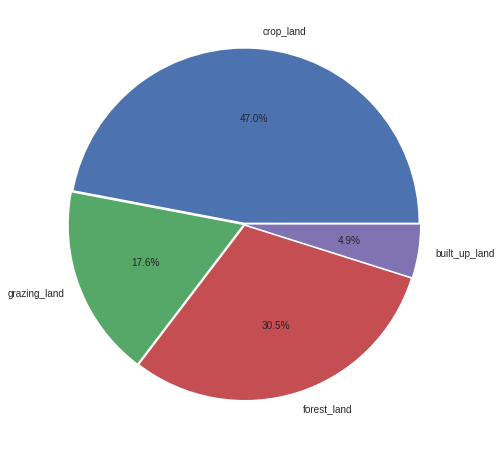

In [ ]:
plt.figure(figsize=(12,8))
plt.pie(list(prod_tot),labels=['crop_land','grazing_land','forest_land','built_up_land'],explode=[0.01]*4,autopct='%1.1f%%')
plt.show()

 ## 7 .some Indicators which are closely tied with footprint value

In [ ]:
sample = data[data.record=='EFProdTotGHA']
mat = px.scatter_matrix(data_frame=sample.loc[:,['crop_land','carbon','total']])
mat.update_layout(title='Influence of carbon footprint and crop_land measures on total footprint',width=1200)
mat.show()

##8. The countries with high Biocapacity ( Biocapacity = Footprint of production because all biocapacity is used for production.)  

In [ ]:

biocap = data[data['record'].isin(['BiocapTotGHA'])]
biocap = biocap[biocap.country!='World']
biocap = biocap[biocap.year==2014]
biocap = biocap.loc[:,['country','total']]
biocap = biocap.groupby(by = 'country',as_index = False).sum()
biocap.sort_values(by='total',ascending= False,inplace= True)
biocap = biocap.head(9)
biocap.sort_values(by='country',inplace=True)

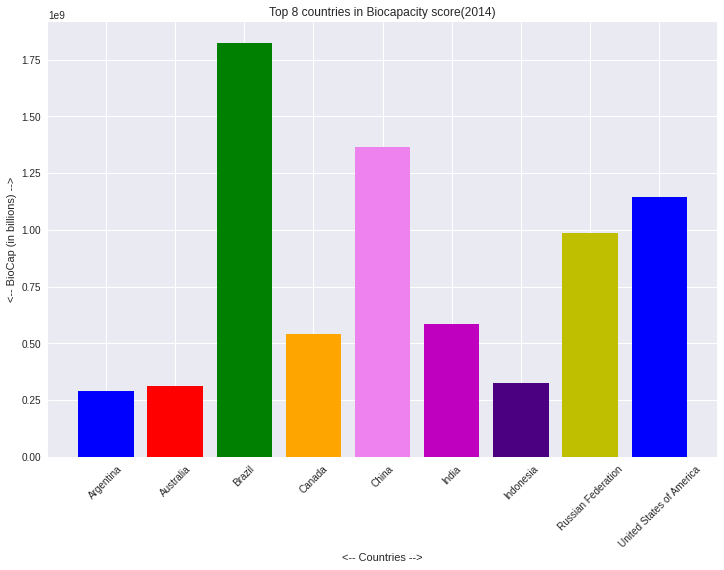

In [ ]:
clrs =['b','r','g','orange','violet','m','indigo','y']
plt.figure(figsize = (12,8))
plt.title('Top 8 countries in Biocapacity score(2014)')
plt.bar(biocap.iloc[:,0],biocap.iloc[:,1],color=clrs,)
plt.xticks(rotation = 45)
plt.ylabel('<-- BioCap (in billions) -->')
plt.xlabel('<-- Countries -->')
plt.show()

In [ ]:
bio = px.bar_polar(data_frame=biocap,r='total',theta='country',color='country')
bio.update_layout(width = 1200,title='8 Leading countries in biocapacity 2014 ')
bio.show()

The plot easily conveys to us how each country stands relative to other countries and
 we can see the clear domination of brazil.Even without looking at the numerical value with the radius we can visually perceive the quantity. 


##9 variation of different records based on Crop Land measures

In [ ]:
sample2 = data[data.record.isin(['EFProdTotGHA','EFConsTotGHA','EFImportsTotGHA'])]
sample2 = sample2[sample2.year==2014]
px.area(sample2,x='crop_land',y='total',color='record',title='Variation of different records')

The area plot of the 3 selected gives us the domination of production record when it comes to crop land and the imports and  consumption follows it.
In the overall population we can also see some places where all three come almost equal so we cannot conclude the clear domination of a specific record here , when we add more records to comparison this may vary. 


## 10. Impact of human land coverage on carbon footprint over the years

In [ ]:
sample = data[data.record=='EFProdTotGHA']
px.scatter(sample,x='built_up_land',y='carbon',color='year',width=1000,title='Impact of Human landcover on carbon footprint')

The plot shows us how much human inhabitance has affected the carbon emissions over the year. 
The more the human land cover the higher the carbon emission.
But we can still see some places in the recent years which has kept the carbon emission and built-up land less


 ## 11 .Total Per capita GDP distribution 

In [ ]:
data['Percapita GDP (2010 USD)'].isna().sum()
gdp = data.loc[:,['Percapita GDP (2010 USD)','country']]
gdp.dropna(inplace=True)
gdp = gdp.groupby(by='country',as_index = False).sum()

In [ ]:
px.violin(data_frame=gdp , y='Percapita GDP (2010 USD)',points= 'all',hover_data=["country"],box=True,title='Per Capita GDP distribution')


The Plot gives us a idea about the distribution of the attribute. We can see that it is a very much skewed attribute. Gives us the information that there are many countries across the globe which are standing in the lower side of the value range. And we get the information about max,min,different quantiles,etc.


## 12. Fishing ground distribution in UN region north america

In [ ]:
box = data[data.country!='World']
box = box[box.year==2014]
box = box[box.UN_region.isin(['North America'])]
px.box(data_frame=box,x='UN_region',y='fishing_ground',width=500)

 The box-plot also gives us some statistics about the attributes distribution ,
 the skewness , IQR,min,max,range,quantiles ,etc
 and this also gives us the outlier in the dataset
. And from the shape of the box plot we can infer the skewness here and the outlier datapoint can also be found.


##13. The range in Australia’s footprint values across years

In [ ]:
aus = data[data.country=='Australia'].loc[:,['year','record','crop_land',	'grazing_land','carbon','Percapita GDP (2010 USD)']]
aus = aus[aus.record.isin(['EFProdTotGHA','EFConsTotGHA'])]
aus.record = aus.record.map({'EFConsTotGHA':0,'EFProdTotGHA':1})
aus.head()

,year,record,crop_land,grazing_land,carbon,Percapita GDP (2010 USD)
3283,1961,0,5.525746e+06,29527386.31,31760184.59,19394.6
3289,1961,1,1.360671e+07,64866428.46,31731389.40,19394.6
3293,1962,0,6.339829e+06,28775897.41,33121712.65,19178.1
3299,1962,1,1.562636e+07,66878517.93,33047279.36,19178.1
3303,1963,0,9.756236e+06,29445746.43,35471852.21,19982.7


In [ ]:
px.parallel_coordinates(aus,color='record', color_continuous_scale=px.colors.diverging.Earth_r,title="Australia's EF values behaviour across years")

record 1 is production and 0 is consumption .

The parallel coordinate plot gives us the information about the importance of crop land and grazing land in the production field, these are clear indicators that over the years autralia's crop land has increased and more used to produce than consume and the carbon emission in both sectors seems to be almost equal but still production sector has seen some high amounts in the recent years.

##14. Countries which use/have high amount of Grazing lands for production 

In [ ]:
land = data[data['record'].isin(['EFProdTotGHA'])]
land = land[land.year==2014]
land = land.loc[:,['country','grazing_land']]
land.sample(5)

,country,grazing_land
84989,Serbia,157352.061100
84089,"Congo, Democratic Republic of",704813.842700
25399,French Guiana,16762.813890
5689,Barbados,914.201039
42889,Lao People's Democratic Republic,61736.174120


In [ ]:
land.dropna(inplace=True)
land = land.groupby(by= 'country',as_index=False).sum()
land.head(3)

,country,grazing_land
0,Afghanistan,5.704672e+06
1,Albania,6.316040e+05
2,Algeria,4.894426e+06


In [ ]:
px.choropleth(data_frame= land,locations = 'country',color = land['grazing_land'],range_color=(20, 20000000),locationmode='country names',title='Total Grazing land per country: 2014')

The colors in the choropleth ranges from low(dark blue) to high (yellow),this clearly classifies some countries which have high amount of grazing land provided the vastness of those countries , but for some countries like france,germany even though their vastness is low they have a good amount of land. On the other side in countries like russia which is large in area we can see a pretty low amount of grazing land.

##15. Countries which are in need of reducing carbon emissions 

In [ ]:
carbon = data[data.year==2014]
carbon = carbon.loc[:,['carbon','country']]
carbon.dropna(inplace = True)
carbon = carbon.groupby(by= 'country',as_index=False).sum()

In [ ]:
fig = px.scatter_geo(data_frame=carbon,locations='country',locationmode='country names',size='carbon', color ='country',size_max=100)
fig.update_layout(showlegend = False,title='Carbon Footprint across the globe')
fig.show()

In [ ]:
forest_land = data[data.year==2014]
forest_land = forest_land.loc[:,['forest_land','country']]
forest_land.dropna(inplace = True)
forest_land = forest_land.groupby(by= 'country',as_index=False).sum()
fig1 = px.scatter_geo(data_frame=forest_land,locations='country',locationmode='country names',size='forest_land', color ='country',size_max=100)
fig1.update_layout(showlegend = False,title='Forest land distribution across the globe')
fig1.show()